<a href="https://colab.research.google.com/github/vrund-patel-contact/Skin-Cancer-Image-Classification-Model/blob/main/Skin_Cancer_Image_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Install all the libraries/modules/frameworks:

In [1]:
# Key note: Python modules are files that can be installed internally or externally.
# If it's internally (already built in python) : Just write: "import module name".
# If it's external: you have to install the library first. You can install the library using the command "pip library-name".
# After installing the library, you can import that library by using the command: "import library-name".
# Once the installation of the library is complete, you can import the library by using the command: "import library-name". In addition, You can proceed to derive modules from that library using commands such as "from library-name import module-name".

!pip install tensorflow --quiet                                       # Tensorflow is a google library.
!pip install opencv-python --quiet                                    # open-cv is a library that you have to install separately.
!pip install numpy --quiet                                            # NumPy is a python library.
!pip install matplotlib --quiet                                       # matplotlib is a python library.

In [2]:
# Key note: Python modules are files that can be installed internally or externally.
# If it's internally (already built in python) : Just write: "import module name".
# If it's external: you have to install the library first. You can install the library using the command "pip library-name".
# After installing the library, you can import that library by using the command: "import library-name".
# Once the installation of the library is complete, you can import the library by using the command: "import library-name". In addition, You can proceed to derive modules from that library using commands such as "from library-name import module-name".

from google.colab import files                                        # files is a module from google.colab.
from tensorflow.keras.preprocessing.image import ImageDataGenerator   # ImageDataGenerator is a class. This class belongs to the module of "image" which is dervied from tensorflow.keras.preprocessing.image.
import zipfile                                                        # Zipfile is an internal python module.
import os                                                             # os is an internal python module.
from tensorflow.keras.applications import EfficientNetB5              # EfficientNetB5 is a class within the submodule of tensorflow.keras.applications.
from tensorflow.keras.layers import Dense                             # Dense is a class within the submodule of tensorflow.keras.layers.
from tensorflow.keras.layers import GlobalAveragePooling2D            # GlobalAveragePooling2D is a class within the submodule of tensorflow.keras.layers.
from tensorflow.keras.layers import Dropout                           # Dropout is a class within the submodule of tensorflow.keras.layers.
from tensorflow.keras.models import Model                             # Model is a class within the submodule of tensorflow.keras.models.
from tensorflow.keras.optimizers import Adam                          # Adam is a class within the submodule of tensorflow.keras.optimizers.
from tensorflow.keras.metrics import AUC                              # AUC is a class within the submodule of tensorflow.keras.metrics.
from tensorflow.keras.callbacks import EarlyStopping                  # EarlyStopping is a class within the submodule of tensorflow.keras.callbacks.
from tensorflow.keras.callbacks import ReduceLROnPlateau              # ReduceLROnPlateau is a class within the submodule of tensorflow.keras.callbacks.
import numpy as np                                                    # NumPy is an external python library that was installed earlier and it's alias is np.
import cv2                                                            # cv2 is a module of the library: opencv-python.
import matplotlib.pyplot as plt                                       # matplotlib.pyplot is a submodule of the library: matplotlib and it's alias is plt.
import matplotlib.image as mpimg                                      # matplotlib.image is a submodule of the library: matplotlib and it's alias is mpimg.
from tensorflow.keras.preprocessing import image                      # image is a module that is derived from tensorflow.keras.preprocessing.
import random                                                         # random is an internal python module.

# Step 2: Upload the zipped folder:


In [3]:
zipped_folder = files.upload() # use the files.upload() function to upload the zipped folder from your computer onto colab.

Saving Melanoma-Cancer-Classification-Dataset.zip to Melanoma-Cancer-Classification-Dataset.zip


# Step 3: Extract the contents of the zipped folder and assign it to a variable:


In [4]:
zipped_pathway = "/content/Melanoma-Cancer-Classification-Dataset.zip"       # The variable of "zipped_pathway" is assigned to Melanoma-Cancer-Classification-Dataset.zip (This is our current zipped folder).
                                                                             # Note: The zipped_pathway must be the same uploaded file as zipped_folder.

extract_zipped_pathway_to = "/content/unzipped_melanoma_dataset"             # The variable of "extract_zipped_pathway_to" is assigned to /content/unzipped_melanoma_dataset. All the data will be assigned/extracted to: /content/unzipped_melanoma_dataset.

os.makedirs(extract_zipped_pathway_to, exist_ok=True)                        # The os.makedirs function is telling python to create a new folder called "/content/unzipped_melanoma_dataset" if it's not assigned within our environment already. However, exist_ok=True just checks to see whether the folder is installed or not.

with zipfile.ZipFile(zipped_pathway, 'r') as zip_ref:                        # zipfile is an internal python module. The function of ZipFile() contains "r" which will read our zipped_pathway folder. In addition, it will assign the entire (zipped pathway, 'r') as zip_ref.
    zip_ref.extractall(extract_zipped_pathway_to)                            # zip_ref.extractall unzips all the zipped data in zipped_pathway and extracts them into extract_zipped_pathway_to or "/content/unzipped_melanoma_dataset".

print("Files have been extracted to:", extract_zipped_pathway_to)            # This indicates that the "Files have been extracted to:, "/content/unzipped_melanoma_dataset".


Files have been extracted to: /content/unzipped_melanoma_dataset


# Step 4: Assign a training and testing directory to the unzipped_melanoma_dataset subfolders:


In [5]:
training_data_directory = "/content/unzipped_melanoma_dataset/Melanoma-Cancer-Classification-Dataset/train" # Assign the training directory to the "train" subfolder (which also contains the benign and malignant subfolders). The training subfolder is located within the "/content/unzipped_melanoma_dataset".
testing_data_directory = "/content/unzipped_melanoma_dataset/Melanoma-Cancer-Classification-Dataset/test"   # Assign the testing directory to the "test" subfolder (which also contains the benign and malignant subfolders). The testing subfolder is located within the "/content/unzipped_melanoma_dataset".

# Step 5: Visualize the data regarding skin cancer:

> The images in the top are Benign and the images in the bottom are Malignant.



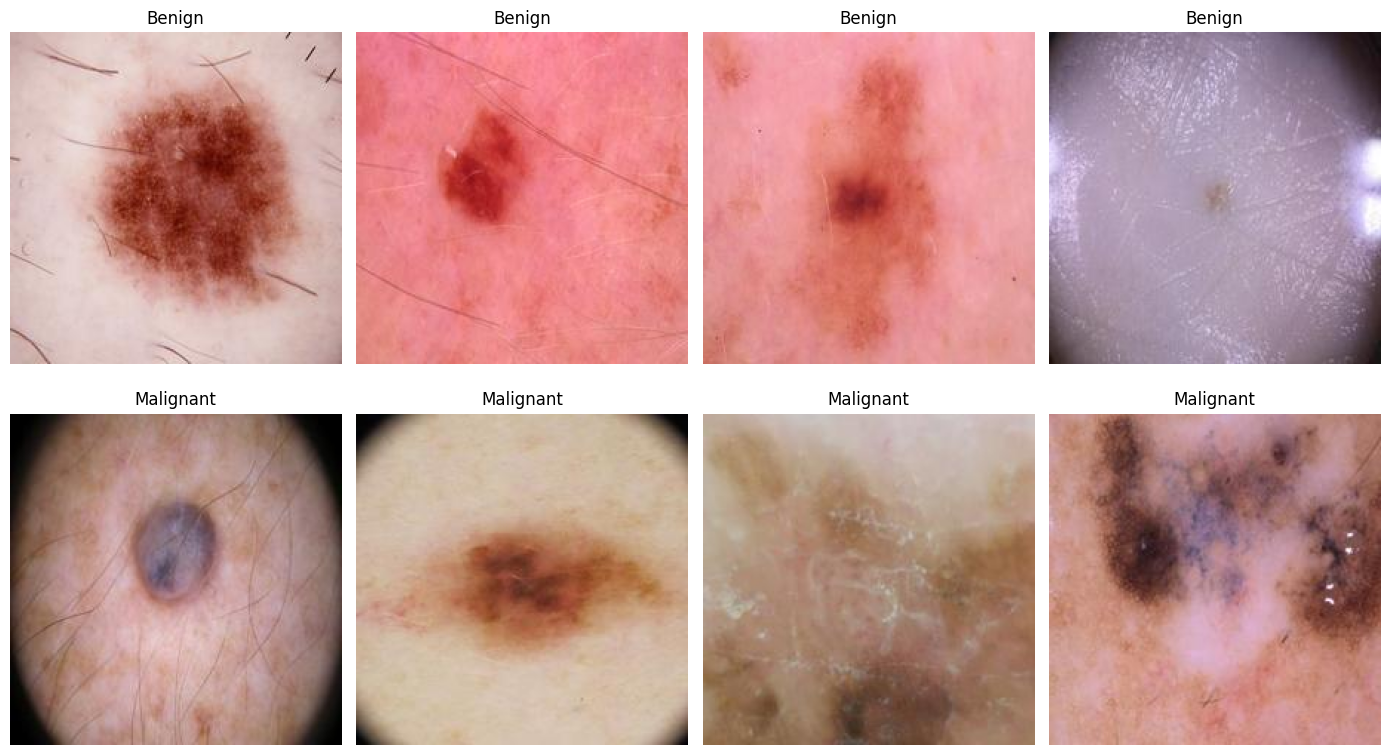

In [6]:
subfolder_names = ["Benign", "Malignant"]                                                                                      # These are the subfolder names that is inside of our testing_data_directory.


benign_subfolder_pathway = os.path.join(training_data_directory, "Benign")                                                     # This will link "/content/unzipped_melanoma_dataset/Melanoma-Cancer-Classification-Dataset/train" with the "Benign" subfolder.
malignant_subfolder_pathway = os.path.join(training_data_directory, "Malignant")                                               # This will link "/content/unzipped_melanoma_dataset/Melanoma-Cancer-Classification-Dataset/train" with the "Malignant" subfolder.

images_from_training_benign_subfolder_pathway = os.listdir(benign_subfolder_pathway)                                           # This will list all the images within the benign_subfolder_pathway.
images_from_training_malignant_subfolder_pathway = os.listdir(malignant_subfolder_pathway)                                     # This will list all the images within the malignant_subfolder_pathway.

four_images_from_training_benign_subfolder = random.sample(images_from_training_benign_subfolder_pathway, 4)                   # This will take 4 .jpg images from the images_from_training_benign_subfolder_pathway.
four_images_from_training_malignant_subfolder = random.sample(images_from_training_malignant_subfolder_pathway, 4)             # This will take 4 .jpg images from the images_from_training_malignant_subfolder_pathway.


plt.figure(figsize = (14, 8))                                                                                                  # This will generate one massive plot that is 16 inches in width and 10 inches in height.

# This for loop will position all 4 benign images within the top portion of the plot:

for i in range(4):
  benign_images = four_images_from_training_benign_subfolder[i]
  final_benign_image_pathway = os.path.join(benign_subfolder_pathway , benign_images)
  final_benign_image = mpimg.imread(final_benign_image_pathway)
  plt.subplot (2 , 4 , i + 1)
  plt.imshow(final_benign_image)
  plt.title("Benign")
  plt.axis('off')


# This for loop will position all 4 Malignant images within the bottom portion of the plot:

for i in range(4):
  malignant_images = four_images_from_training_malignant_subfolder[i]
  final_malignant_image_pathway = os.path.join(malignant_subfolder_pathway , malignant_images)
  final_malignant_image = mpimg.imread(final_malignant_image_pathway)
  plt.subplot (2 , 4 , i + 5)
  plt.imshow(final_malignant_image)
  plt.title("Malignant")
  plt.axis('off')

plt.tight_layout()
plt.show()


# Step 6: Create modifiers that will be used to augment our data:

In [8]:
target_size = (300, 300) # This is the height (300 pixels) x width (300 pixels).
batch_size = 32          # Image amount

#  This is the training modifier. We will create a modifier (function) that is assigned to a class called ImageDataGenerator. This will apply augmentations to the images that go through it.

Training_data_modifier = ImageDataGenerator(

    rescale = 1./255,                  # This will divide every index value within the array by 255 (each index value is just a R,G or B value). This will result in each index value being between 0 and 1.
    horizontal_flip = True,            # Horizontally flips the image.
    vertical_flip = True,              # Vertically flips the image.
    rotation_range = 20,               # This randomly rotates the image at 20 degrees.
    height_shift_range = 0.2,          # This shifts the image vertically at a rate of 20 percent.
    width_shift_range = 0.2,           # This shifts the image horizontally at a rate of 20 percent.
    shear_range = 0.2,                 # This applies a shear at a rate of 20 percent.
    zoom_range = 0.2,                  # This allows the image to be zoomed in and out at a rate of 20 percent.
    channel_shift_range = 20,          # Since each pixel contains [RGB], each value of R, G  or B can change in colour value from a range of -20 to +20.
    fill_mode = "nearest",             # This fills the empty pixels within the inputted image. Since augmentations can change the image, some portions of the image may have the possibility to be empty. fill_mode = "nearest" takes the nearest pixel value beside the empty data and fills the empty data with that value.
    validation_split = 0.20            # This saves 20 percent of the data used within training to validate results. For ex. If I have 1000 pictures, it will set aside 200 of those pictures for validation and it will use 800 of those pictures for training.

)

# This is the testing modifier. We will now create a modifier (function) that is assigned to a class called ImageDataGenerator. This will only rescale the image size.

Testing_data_modifier = ImageDataGenerator( rescale = 1./255)    # This will divide every index value within the array by 255 (each index value is just a R,G or B value). This will result in each index value being between 0 and 1.


# Step 7: Assign 3 functions for the model: training, validity and testing:

> These 3 functions will have their corresponding dataset augmented by the modifiers we made in the previous step.





In [9]:
# This is the Training function:

Training_melanoma_data_function = Training_data_modifier.flow_from_directory ( # flow.from_directory is a method that will automatically load the images from your designated directory.


  directory = training_data_directory,                               # The images within training_data_directory will be augmented.
  target_size = (300, 300),                                          # This is the height (300 pixels) x width (300 pixels).
  batch_size = 32,                                                   # Image amount
  class_mode = "binary",                                             # The "train" folder contains 2 additional subfolders of benign and malignant. It will assign the benign images within the subfolder of benign as 0 and the malignant images within the subfolder of malignant as 1.
  subset = "training",                                               # This indicates that we will use 80 percent of the data in: training_data_directory".
  shuffle = True,                                                    # This changes the order of the images randomly during each round or epoch.
  interpolation='bicubic'                                            # This is an algorithm that resizes the image into our desired size of (300, 300) without losing detail.

)

# This is the validation function:

Validity_melanoma_data_function = Training_data_modifier.flow_from_directory (

  directory = training_data_directory,                               # The images within training_data_directory will be augmented.
  target_size = (300, 300),                                          # This is the height (300 pixels) x width (300 pixels).
  batch_size = 32,                                                   # Image amount
  class_mode = "binary",                                             # The "train" folder contains 2 additional subfolders of benign and malignant. It will assign the benign images within the subfolder of benign as 0 and the malignant images within the subfolder of malignant as 1.
  subset = "validation",                                             # training_augmentation_data_modifier will not be applied due to the parameter of subset = "validation" being present. In addition, 20 percent of the data that we saved from earlier will be used because of this line: subset = "validation"
  shuffle = False,                                                   # This will not change the order of the images randomly during each round or epoch.
  interpolation='bicubic'                                            # This is an algorithm that resizes the image into our desired size of (300, 300) without losing detail.
)

# This is the testing function:

Testing_melanoma_data_function = Testing_data_modifier.flow_from_directory (

  directory = testing_data_directory,                                # The images within testing_data_directory will be augmented.
  target_size = (300, 300),                                          # This is the height (300 pixels) x width (300 pixels).
  batch_size = 32,                                                   # Image amount
  class_mode = "binary",                                             # The "Test" folder contains 2 additional subfolders of benign and malignant. It will assign the benign images within the subfolder of benign as 0 and the malignant images within the subfolder of malignant as 1.
  shuffle = False,                                                   # This will not change the order of the images randomly during each round or epoch.

)

Found 9504 images belonging to 2 classes.
Found 2375 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Step 8: Modify the pre-trained EfficientNetB5 model:

In [10]:
pre_trained_CNN_model = EfficientNetB5( # EfficientNetB5 is a pre-trained CNN model.

        weights = "imagenet",                                                                      # Weights = "imagenet" tells the EfficientNetB5 model to utilize the patterns it picked up while it was training on the dataset of imagenet. The dataset of imagenet has over 10 million images.
        include_top=False,                                                                         # This tells the EfficientNetB5 model to remove the last layer of it's structure (We want to remove the pre-trained final layer and add our own final layer. This will allow us to create a new final layer which will indicate whether an image is benign or malignant.)
        input_shape=(300, 300, 3),                                                                 # This represents the image size. The height is 300 pixels, the width is 300 pixels, and "3" represents RGB combinations.

)

pre_trained_CNN_model.trainable = True                                                             # When we set pre_trained_CNN_model.trainable to be true, we are allowing the model to change it's current weights depending on the new data that will be inputted within it.
feature_map_outputs = pre_trained_CNN_model.output                                                 # What this does essentially is that it will take the output of the pre_trained_CNN_model and it will create feature maps (patterns within the image) regarding the images that have been inputted within it.

feature_averages = GlobalAveragePooling2D()(feature_map_outputs)                                   # This will produce a 1D vector that will comprise of feature map averages. This essentially means that the 1D vector will contain multiple numbers where each number represents an average amount of each feature map (patterns in the image) and it will produce a number within the 1D vector for that particular pattern.
                                                                                                   # If a feature map is commonly present within the image, the number within the 1D vector for it's feature map average will be high and vice versa.

additional_neuron_layer = Dense(512, activation='swish')(feature_averages)                         # The feature_averages from the previous line (the 1D vector) will be inputted within the Dense layer (512 neurons) and the 512 neurons will give an output depending on the 1D vector that was inputted within the Dense layer.
additional_drop_layer = Dropout(0.5)(additional_neuron_layer)                                      # This will randomly turn half of the neurons off during training.
final_layer_output = Dense(1, activation='sigmoid')(additional_drop_layer)                         # This final layer only contains 1 neuron. This neuron will have activation sigmoid which will return a range between 0 to 1.


115263384/115263384 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Step 9: Compile the model and display it's summary:

In [11]:
# This will take the pre_trained_CNN_model and it will combine it with final_layer_output:

final_zero_to_one_classification_model = Model(
      inputs = pre_trained_CNN_model.input,                                                 # This is the initial layer of our model. The ".input" will tell final_zero_to_one_classification_model to intake (300, 300, 3) or "input_shape" as the image type.
      outputs = final_layer_output                                                          # This is the final layer of our model. This layer will contain 1 neuron. This neuron will give us a value between 0 to 1.
      )

final_zero_to_one_classification_model.compile ( # This compiles the code for the final model

        optimizer = Adam(learning_rate = 0.00001),                                          # This optimizer named Adam helps optimize the weights of the final_zero_or_one_classification_model in order to improve predictions.
        loss = 'binary_crossentropy',                                                       # This is essentially a loss function. This looks at the model's predictions and compares them to the actual result and views how far of a difference it is.

        metrics = ['accuracy', AUC(name='AUC', from_logits=False)]                          # The accuracy metric keeps count on how accurate the model predicts the benign and melanoma images. The AUC metric (Area under a curve) gives us a output between 0 to 1. If your number is close to 1, it means that the model is perfectly predicting whether the image is malignant/benign.
                                                                                            # The model's accuracy depends on this outputted number. If the outputted number is close to 1, it means that the model is accurately predicting the malignant/benign images. In addition, if the outputted number is close to 0.5 or less than 0.5, it means that the model is just guessing and it's not accurately predicting the malignant/benign images.
  )

final_zero_to_one_classification_model.summary()                                            # This provides a summary of our final training model.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 300, 300,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 300, 300,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 300, 300,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 301, 301,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 150, 150,  │      1,296 │ stem_conv_pad[0]… │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 150, 150,  │        192 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 150, 150,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 150, 150,  │        432 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 150, 150,  │        192 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 150, 150,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 48)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 48)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 12)  │        588 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 48)  │        624 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 150, 150,  │          0 │ block1a_activati… │
│ (Multiply)          │ 48)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 150, 150,  │      1,152 │ block1a_se_excit

 Total params: 29,563,128 (112.77 MB)

 Trainable params: 29,390,385 (112.12 MB)

 Non-trainable params: 172,743 (674.78 KB)

# Step 10: Create callback functions that will monitor and check if the model is performing the way it should be:

In [12]:
Early_stopping_callback = EarlyStopping( # This is a callback function which monitors the progress of our model on the validation dataset. It stops training the model (training dataset) if it does not improve or learn properly.

    monitor = 'val_loss',                # This parameter is a measure of how well the model performs on the validation dataset (remaining 20 percent of the training dataset). A low validation loss means that the model's predictions are very close to the actual result of the image.
    patience = 5,                        # If the model does not perform well for 5 epochs, the model stops training.
    restore_best_weights = True          # As the model stops training, it will go to the last epoch that had the lowest validation loss and it will continue to train from there.

)

ReduceLROnPlateau_callback = ReduceLROnPlateau(

    monitor = 'val_loss',                # This parameter is a measure of how well the model performs on the validation dataset (remaining 20 percent of the training dataset).
    factor = 0.2,                        # If the val_loss gets better for every epoch (validation loss gets lower), the min_lr stays the same. However, if the val_loss does not get better for 3 epochs (validation loss gets lower), the current rate at which the model is learning at will be multiplied by a factor of 0.2.
    patience = 3,                        # If the validation loss does not improve on the validation dataset for 3 epochs, we will multiply the current learning rate by a factor of 0.2.
    min_lr = 0.00001                     # This is the minimum learning rate and it will not go below this threshold. This is our initial learning rate per epoch.

)


# Step 11: Proceed to make the final testing model:

In [ ]:
# .samples keeps count of the total number of images in that function. steps_per_epoch and validation_steps are argument names that must be written.


Model_timeline = final_zero_to_one_classification_model.fit(                            # The .fit() function tells the final_zero_to_one_classification_model to start training. The final_zero_to_one_classification_model will utilize the Training_melanoma_data_function.

x = Training_melanoma_data_function,                                                    # This is the function which contains the training dataset. The model will learn from this dataset.
validation_data = Validity_melanoma_data_function,                                      # Validity_melanoma_data_function contains the Validity dataset that will be assigned to validation_data. The model will use this dataset after every epoch to analyze it's overall performance.
steps_per_epoch = Training_melanoma_data_function.samples // batch_size,                # This represents the number of batches that will be trained during each epoch.
validation_steps = Validity_melanoma_data_function.samples // batch_size,               # This represents the number of batches that will be used for validation after each epoch is complete.
epochs = 20,                                                                            # During the training process, this tells our model to through the entire training dataset 6 times.
callbacks = [Early_stopping_callback, ReduceLROnPlateau_callback],                      # These are callback functions which monitor the progress of our model on the validation dataset. It stops training the model (training dataset) if it does not improve or learn properly.

)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


# Step 12: Save the model:

In [ ]:
final_zero_to_one_classification_model.save("Skin-Cancer-Image-Classification-Model.keras") # This saves our trained model.

# Step 13: Vizualize the model:

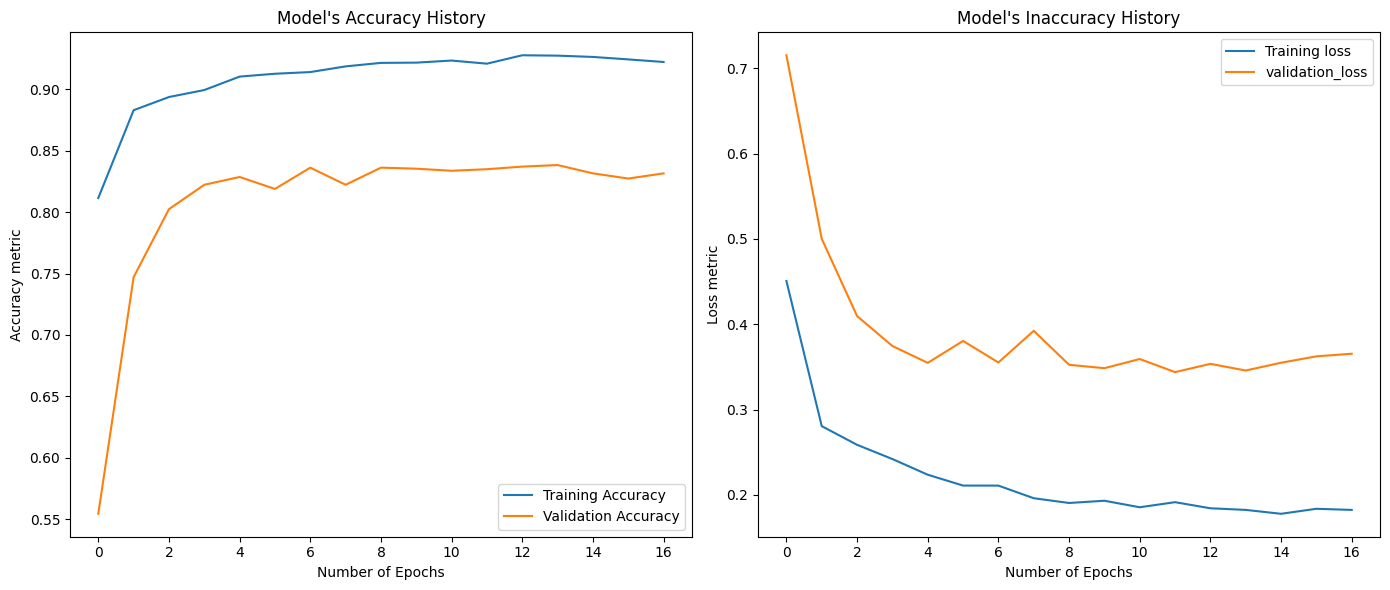

In [ ]:
# The graph below will show the history regarding our model's training/accuracy and how well it performed on the Validity_melanoma_data_function.

plt.figure(figsize = (14 ,6))
plt.subplot(1, 2, 1)
plt.title("Model's Accuracy History")
plt.plot(Model_timeline.history['accuracy'], label='Training Accuracy')
plt.plot(Model_timeline.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy metric")
plt.legend()

# This graph will plot our Model's inaccuracy history (this will be represented as val_loss). In addition, it will also contain our Model's accuracy history (this will be represented as val_accuracy).

plt.subplot(1, 2, 2)
plt.title("Model's Inaccuracy History")
plt.plot(Model_timeline.history['loss'], label='Training loss')
plt.plot(Model_timeline.history['val_loss'], label='validation_loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss metric")
plt.legend()

plt.tight_layout()
plt.show()

# Step 14: Check how well the model predicts the testing data:

In [ ]:
# .evaluate is a method. Within our case, it will give us an array of 3 values that will tell us:

# 1. test_loss = This value determines how good/bad your model performed on the Testing_melanoma_data_function. The model did a great job at predicting the images if the outputted number was low. However, The model did not do a great job at predicting the images if the outputted number was high.
# 2. test_accuracy = How many pictures were correctly identified.
# 3. test_AUC = How well the model was able to differ malignant and benign images from one another.

test_metrics = final_zero_to_one_classification_model.evaluate(Testing_melanoma_data_function)
print(f"Test Loss: {test_metrics[0] * 100}")
print(f"Test Accuracy: {test_metrics[1] * 100}")
print(f"Test AUC: {test_metrics[2] * 100}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - AUC: 0.5078 - accuracy: 0.9443 - loss: 0.1381
Test Loss: 20.607997477054596
Test Accuracy: 91.44999980926514
Test AUC: 98.10925722122192


# Step 15: Pick random malignant/benign images and analyze the final model's results:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


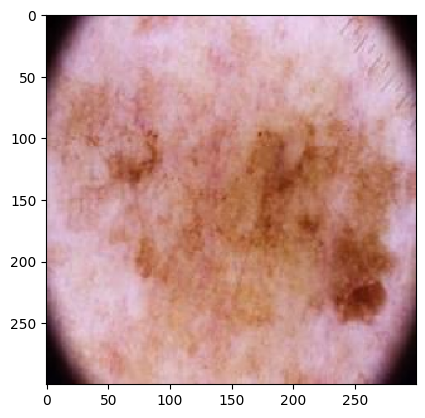

Predicted Result: Malignant || Correct Result: Malignant 


In [ ]:
subfolder_names = ["Benign", "Malignant"]                                                                                                                # These are the subfolder names that is inside of our testing_data_directory.
choose_random_subfolder = random.choice(subfolder_names)                                                                                                 # This will access a benign or malignant subfolder by using the "random" module.

testing_subfolder_directory = os.path.join("/content/unzipped_melanoma_dataset/Melanoma-Cancer-Classification-Dataset/test", choose_random_subfolder)    # This will link the testing_data_directory to the benign or malignant subfolder.
                                                                                                                                                         # For ex, if the random subfolder is benign, the subfolder_directory will be "/content/unzipped_melanoma_dataset/Melanoma-Cancer-Classification-Dataset/test/benign".

image_pathway = random.choice(os.listdir(testing_subfolder_directory))                                                                                   # This will give us our image pathway. For ex, our current image_pathway is "img98.jpg"

final_image_directory = os.path.join(testing_subfolder_directory, image_pathway)                                                                         # This will link the subfolder_directory with the image_pathway.
                                                                                                                                                         # For ex, if the subfolder_directory is "/content/unzipped_melanoma_dataset/Melanoma-Cancer-Classification-Dataset/test/benign" and the image_pathway is "img98.jpg",
                                                                                                                                                         # then the final_image_directory would be "/content/unzipped_melanoma_dataset/Melanoma-Cancer-Classification-Dataset/test/benign/img98.jpg".

final_resized_image = image.load_img(final_image_directory, target_size = (300, 300))                                                                    # This will resize the image to the size of (300, 300).
image_to_array_conversion = image.img_to_array(final_resized_image)                                                                                      # This will convert our final_resized_image into a numPy array.
image_to_array_conversion = image_to_array_conversion / 255                                                                                              # This will divide every index value within the array by 255 (each index value is just a R,G or B value). This will result in each index value being between 0 and 1.
image_to_array_with_batch_size = np.expand_dims(image_to_array_conversion, axis = 0)                                                                     # Since the model can only take batches, we have to add a new dimension at the index of 0. The batch size will be added as an argument at index 0.



predictions = final_zero_to_one_classification_model.predict(image_to_array_with_batch_size)[0][0]                                                       # This will give us an outputted value with regards to what the model predicted by analyzing our image (which is represented as an array).

if predictions > 0.5:                                                                                                                                    # If the predicted score is greater than 0.5, predicted_result will output "Malignant" and if the predicted score is less than 0.5, predicted_result will output "Benign".
    predicted_result = ("Malignant")
else:
    predicted_result = ("Benign")

Correct_result_from_subfolder_directory = choose_random_subfolder                                                                                        # This is the correct value of the image.
plt.imshow(image_to_array_conversion)                                                                                                                    # This will upload our numPy array. The numPy array is just an array/matrix that contains the RGB values for each pixel within the image.
plt.show()                                                                                                                                               # Displays the image.
print(f"Predicted Result: {predicted_result} || Correct Result: {Correct_result_from_subfolder_directory} ")                                             # Indicates the predicted_result and the Correct_result_from_subfolder_directory below the image.

